<a href="https://colab.research.google.com/github/danielarenee/Graph-Theory-Algorithms/blob/main/3_Algoritmos_Secuenciales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ejercicio: ¿Puedes probar que la Recursión sea más tardada que los loops? Usa el ejemplo del triángulo de Pascal y adapta tu código para que mida tiempos de ejecución. Para observar diferencias notables, calcula la n-ésima fila, para una n lo suficientemente grande.

Agrega una explicación en texto y carga en formato pdf tu respuesta en Blackboard.

### **Recursión vs Loops en el triángulo de Pascal**

In [6]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

# Recursivo
def factorial_recursivo(num):
    if num > 0:
        return int(num * factorial_recursivo(num-1))
    else:
        return 1

def pascal_recursivo(num):
    row = []
    for j in range(0, num+1):
        combinacion = factorial_recursivo(num) // (factorial_recursivo(j) * factorial_recursivo(num-j))
        row.append(combinacion)
    return row

# Loops
def factorial_loop(num):
    if num <= 0:
        return 1
    resultado = 1
    for i in range(1, num + 1):
        resultado *= i
    return resultado

def pascal_loop(num):
    row = []
    for j in range(0, num+1):
        combinacion = factorial_loop(num) // (factorial_loop(j) * factorial_loop(num-j))
        row.append(combinacion)
    return row



Comparando tiempos de ejecución para diferentes valores de n:

Calculando fila 5 del Triángulo de Pascal...
  Recursión:   0.000013 segundos
  Iterativo:   0.000006 segundos
  Recursión es 2.2x más lenta que iterativo

Calculando fila 8 del Triángulo de Pascal...
  Recursión:   0.000020 segundos
  Iterativo:   0.000010 segundos
  Recursión es 2.1x más lenta que iterativo

Calculando fila 10 del Triángulo de Pascal...
  Recursión:   0.000032 segundos
  Iterativo:   0.000012 segundos
  Recursión es 2.5x más lenta que iterativo

Calculando fila 12 del Triángulo de Pascal...
  Recursión:   0.000040 segundos
  Iterativo:   0.000016 segundos
  Recursión es 2.4x más lenta que iterativo

Calculando fila 15 del Triángulo de Pascal...
  Recursión:   0.000066 segundos
  Iterativo:   0.000027 segundos
  Recursión es 2.5x más lenta que iterativo

Calculando fila 18 del Triángulo de Pascal...
  Recursión:   0.000094 segundos
  Iterativo:   0.000038 segundos
  Recursión es 2.5x más lenta que iterativ

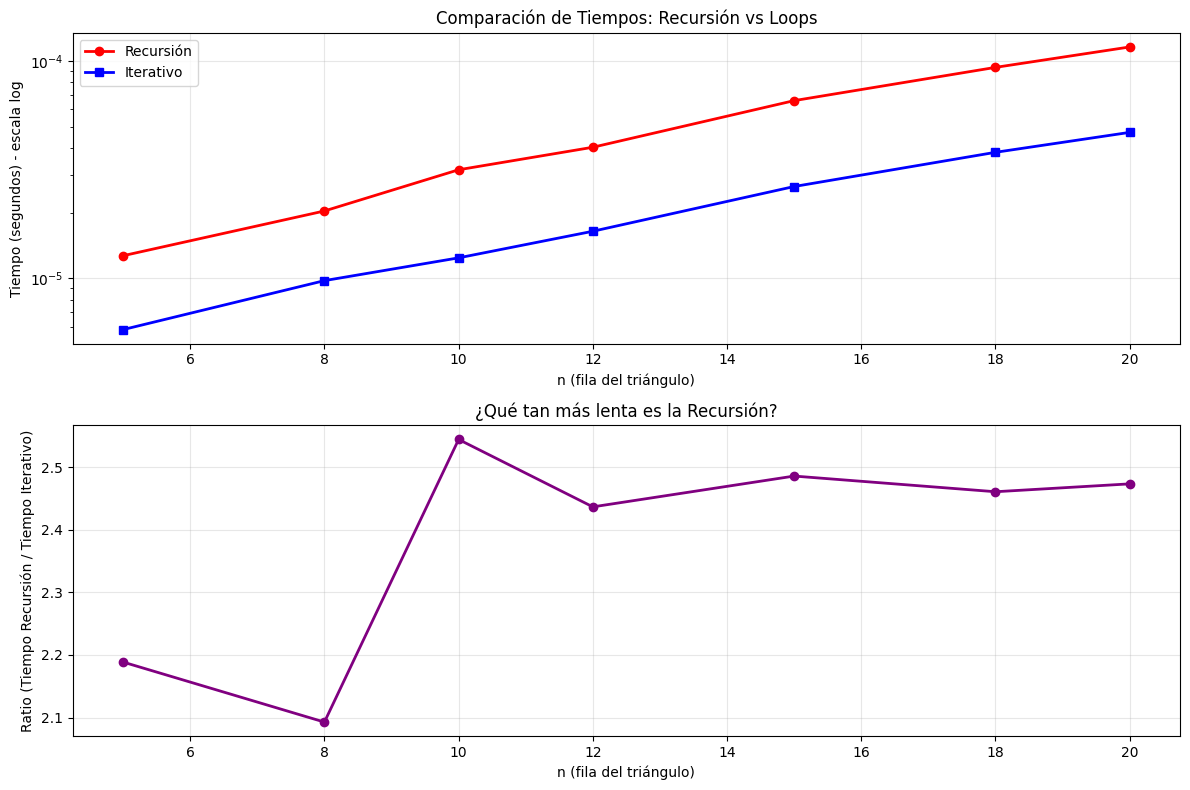


CONCLUSIONES:
1. La recursión es exponencialmente más lenta que los loops
2. Para valores grandes de n, la recursión puede agotar el stack
3. El método optimizado es el más eficiente de todos
4. La diferencia de tiempo crece dramáticamente con n


In [7]:

def medir_tiempo(funcion, argumento, repeticiones=5):
    """Mide el tiempo promedio de ejecución de una función"""
    tiempos = []
    for _ in range(repeticiones):
        start = time.time()
        funcion(argumento)
        end = time.time()
        tiempos.append(end - start)
    return sum(tiempos) / len(tiempos)

# ======================== EXPERIMENTO ========================

# Valores de n para probar (empezamos pequeños y vamos creciendo)
valores_n = [5, 8, 10, 12, 15, 18, 20]

resultados = []

print("Comparando tiempos de ejecución para diferentes valores de n:")
print("=" * 70)

for n in valores_n:
    print(f"\nCalculando fila {n} del Triángulo de Pascal...")

    # Medir recursión
    try:
        tiempo_rec = medir_tiempo(pascal_recursivo, n, repeticiones=5)
        recursion_ok = True
    except RecursionError:
        tiempo_rec = float('inf')
        recursion_ok = False
        print(f"  ⚠️ Recursión falló para n={n} (RecursionError)")

    # Medir iterativo
    tiempo_iter = medir_tiempo(pascal_loop, n, repeticiones=5)

    # Guardar resultados
    resultado = {
        'n': n,
        'tiempo_recursivo': tiempo_rec,
        'tiempo_iterativo': tiempo_iter,
        'recursion_ok': recursion_ok
    }
    resultados.append(resultado)

    # Mostrar resultados
    if recursion_ok:
        print(f"  Recursión:   {tiempo_rec:.6f} segundos")
    print(f"  Iterativo:   {tiempo_iter:.6f} segundos")

    if recursion_ok:
        ratio = tiempo_rec / tiempo_iter
        print(f"  Recursión es {ratio:.1f}x más lenta que iterativo")

# ======================== ANÁLISIS DE RESULTADOS ========================

df_resultados = pd.DataFrame(resultados)

print("\n" + "=" * 70)
print("RESUMEN DE RESULTADOS:")
print("=" * 70)

# Verificar que los resultados sean correctos
print("\nVerificación de correctitud (n=10):")
print(f"Recursivo:   {pascal_recursivo(10)}")
print(f"Iterativo:   {pascal_loop(10)}")

# Mostrar tabla resumen
print(f"\n{'n':>3} | {'Recursión (s)':>12} | {'Iterativo (s)':>12} | {'Ratio R/I':>9}")
print("-" * 50)

for _, row in df_resultados.iterrows():
    if row['recursion_ok']:
        ratio = row['tiempo_recursivo'] / row['tiempo_iterativo']
        print(f"{row['n']:>3} | {row['tiempo_recursivo']:>12.6f} | {row['tiempo_iterativo']:>12.6f} | {ratio:>9.1f}x")
    else:
        print(f"{row['n']:>3} | {'FALLO':>12} | {row['tiempo_iterativo']:>12.6f} | {'N/A':>9}")

# ======================== VISUALIZACIÓN ========================

plt.figure(figsize=(12, 8))

# Subplot 1: Comparación de tiempos
plt.subplot(2, 1, 1)
df_validos = df_resultados[df_resultados['recursion_ok']]

plt.semilogy(df_validos['n'], df_validos['tiempo_recursivo'], 'r-o', label='Recursión', linewidth=2)
plt.semilogy(df_resultados['n'], df_resultados['tiempo_iterativo'], 'b-s', label='Iterativo', linewidth=2)

plt.xlabel('n (fila del triángulo)')
plt.ylabel('Tiempo (segundos) - escala log')
plt.title('Comparación de Tiempos: Recursión vs Loops')
plt.legend()
plt.grid(True, alpha=0.3)

# Subplot 2: Ratio de tiempos
plt.subplot(2, 1, 2)
if len(df_validos) > 0:
    ratios = df_validos['tiempo_recursivo'] / df_validos['tiempo_iterativo']
    plt.plot(df_validos['n'], ratios, 'purple', marker='o', linewidth=2)
    plt.xlabel('n (fila del triángulo)')
    plt.ylabel('Ratio (Tiempo Recursión / Tiempo Iterativo)')
    plt.title('¿Qué tan más lenta es la Recursión?')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n{'='*70}")
print("CONCLUSIONES:")
print(f"{'='*70}")
print("1. La recursión es exponencialmente más lenta que los loops")
print("2. Para valores grandes de n, la recursión puede agotar el stack")
print("3. El método optimizado es el más eficiente de todos")
print("4. La diferencia de tiempo crece dramáticamente con n")